In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [2]:
import pandas as pd
import numpy as np
class translate_dict(object):
    def __init__(self):
        chrtab = """Chromosome 1	CM000093.5	=	NC_006088.5	7
Chromosome 2	CM000094.5	=	NC_006089.5	0
Chromosome 3	CM000095.5	=	NC_006090.5	4
Chromosome 4	CM000096.5	=	NC_006091.5	0
Chromosome 5	CM000097.5	=	NC_006092.5	0
Chromosome 6	CM000098.5	=	NC_006093.5	6
Chromosome 7	CM000099.5	=	NC_006094.5	0
Chromosome 8	CM000100.5	=	NC_006095.5	0
Chromosome 9	CM000101.5	=	NC_006096.5	1
Chromosome 10	CM000102.5	=	NC_006097.5	0
Chromosome 11	CM000103.5	=	NC_006098.5	0
Chromosome 12	CM000104.5	=	NC_006099.5	0
Chromosome 13	CM000105.5	=	NC_006100.5	1
Chromosome 14	CM000106.5	=	NC_006101.5	1
Chromosome 15	CM000107.5	=	NC_006102.5	1
Chromosome 16	CM000108.5	=	NC_006103.5	1
Chromosome 17	CM000109.5	=	NC_006104.5	0
Chromosome 18	CM000110.5	=	NC_006105.5	0
Chromosome 19	CM000111.5	=	NC_006106.5	1
Chromosome 20	CM000112.5	=	NC_006107.5	0
Chromosome 21	CM000113.5	=	NC_006108.5	0
Chromosome 22	CM000114.5	=	NC_006109.5	1
Chromosome 23	CM000115.5	=	NC_006110.5	6
Chromosome 24	CM000116.5	=	NC_006111.5	0
Chromosome 25	CM000124.5	=	NC_006112.4	1
Chromosome 26	CM000117.5	=	NC_006113.5	0
Chromosome 27	CM000118.5	=	NC_006114.5	0
Chromosome 28	CM000119.5	=	NC_006115.5	1
Chromosome 30	CM003637.2	=	NC_028739.2	0
Chromosome 31	CM003638.2	=	NC_028740.2	3
Chromosome 32	CM000120.4	=	NC_006119.4	0
Chromosome 33	CM000123.5	=	NC_008465.4	1
Chromosome W	CM000121.5	=	NC_006126.5	52
Chromosome Z	CM000122.5	=	NC_006127.5""".split('\n')
        chrtab = [i.split('\t') for i in chrtab]
        self.chrdf = pd.DataFrame(chrtab)[[0,3]]
        self.chrdf[0] = [i.split(' ')[1] for i in self.chrdf[0]]
        self.chrdf.columns = ['chrnum', 'name']
        
        chr_ranks='''NC_006088.5	197608386	1
NW_020109737.1	1765	419
NW_020109738.1	2384	398
NW_020109739.1	4675	344
NW_020109740.1	5861	323
NW_020109741.1	10869	221
NW_020109742.1	21511	103
NW_020109743.1	22289	97
NC_006089.5	149682049	2
NC_006090.5	110838418	3
NW_020109744.1	509	457
NW_020109745.1	1783	417
NW_020109746.1	6272	316
NW_020109747.1	7246	291
NC_006091.5	91315245	4
NC_006092.5	59809098	6
NC_006093.5	36374701	8
NW_020109748.1	4087	358
NW_020109749.1	4448	350
NW_020109750.1	5224	334
NW_020109751.1	10724	223
NW_020109752.1	10928	219
NW_020109753.1	18845	121
NC_006094.5	36742308	7
NC_006095.5	30219446	9
NC_006096.5	24153086	10
NW_020109754.1	27963	67
NC_006097.5	21119840	11
NC_006098.5	20200042	13
NC_006099.5	20387278	12
NC_006100.5	19166714	14
NW_020109755.1	2157	403
NC_006101.5	16219308	15
NW_020109756.1	765	448
NC_006102.5	13062184	17
NW_020109757.1	2034	408
NC_006103.5	2844601	32
NW_020109758.1	149503	45
NC_006104.5	10762512	19
NC_006105.5	11373140	18
NC_006106.5	10323212	20
NW_020109759.1	1131	438
NC_006107.5	13897287	16
NC_006108.5	6844979	23
NC_006109.5	5459462	29
NW_020109760.1	918	444
NC_006110.5	6149580	27
NW_020109761.1	322	460
NW_020109762.1	1264	435
NW_020109763.1	1662	424
NW_020109764.1	15003	161
NW_020109765.1	16157	142
NW_020109766.1	18922	120
NC_006111.5	6491222	25
NC_006112.4	3980610	31
NW_020109767.1	1884	413
NC_006113.5	6055710	28
NC_006114.5	8080432	21
NC_006115.5	5116882	30
NW_020109768.1	1519	430
NC_028739.2	1818525	36
NC_028740.2	6153034	26
NW_020109769.1	9481	245
NW_020109770.1	11305	211
NW_020109771.1	11340	210
NC_006119.4	725831	39
NC_008465.4	7821666	22
NW_020109772.1	182	463
NC_006126.5	6813114	24
NW_020109775.1	1568	428
NW_020109776.1	2003	410
NW_020109777.1	2092	405
NW_020109778.1	3094	376
NW_020109779.1	5587	329
NW_020109780.1	6668	306
NW_020109781.1	6830	299
NW_020109782.1	6929	295
NW_020109783.1	7074	293
NW_020109784.1	7765	283
NW_020109785.1	7878	282
NW_020109786.1	8166	274
NW_020109787.1	8267	269
NW_020109788.1	8275	268
NW_020109789.1	8559	264
NW_020109790.1	8909	256
NW_020109791.1	9034	251
NW_020109792.1	9182	248
NW_020109793.1	9607	242
NW_020109794.1	10106	231
NW_020109795.1	10162	230
NW_020109796.1	10224	229
NW_020109797.1	10371	227
NW_020109798.1	10551	225
NW_020109799.1	10871	220
NW_020109800.1	11068	215
NW_020109801.1	12127	200
NW_020109802.1	12728	192
NW_020109803.1	13691	180
NW_020109804.1	13829	177
NW_020109805.1	14047	174
NW_020109806.1	14330	169
NW_020109807.1	14810	162
NW_020109808.1	15438	154
NW_020109809.1	16043	146
NW_020109810.1	16320	139
NW_020109811.1	17217	134
NW_020109812.1	17224	133
NW_020109813.1	17321	131
NW_020109814.1	17442	129
NW_020109815.1	18028	128
NW_020109816.1	19032	118
NW_020109817.1	19204	116
NW_020109818.1	19471	115
NW_020109819.1	19721	113
NW_020109820.1	19850	112
NW_020109821.1	19928	110
NW_020109822.1	22964	92
NW_020109823.1	23209	89
NW_020109824.1	24105	85
NW_020109825.1	27808	69
NW_020109826.1	28212	66
NC_006127.5	82529921	5
NW_020109829.1	15587	152
NW_020109830.1	27104	71
NW_020109831.1	27130	70
NW_020109832.1	27830	68
NW_020109833.1	28243	65
NW_020109834.1	29697	64
NW_020109835.1	30157	63
NW_020109836.1	30225	62
NW_020109837.1	30439	61
NW_020109838.1	30818	60
NW_020109839.1	33030	59
NW_020109840.1	33083	58
NW_020109841.1	33731	56
NW_020109842.1	33531	57
NW_020109843.1	33802	55
NW_020109844.1	87	464
NW_020109845.1	246	461
NW_020109846.1	195	462
NW_020109847.1	345	458
NW_020109848.1	342	459
NW_020109849.1	579	455
NW_020109850.1	555	456
NW_020109851.1	623	453
NW_020109852.1	597	454
NW_020109853.1	676	451
NW_020109854.1	644	452
NW_020109855.1	678	449
NW_020109856.1	677	450
NW_020109857.1	806	446
NW_020109858.1	791	447
NW_020109859.1	950	443
NW_020109860.1	848	445
NW_020109861.1	966	441
NW_020109862.1	955	442
NW_020109863.1	1115	439
NW_020109864.1	1086	440
NW_020109865.1	1173	436
NW_020109866.1	1167	437
NW_020109867.1	1381	433
NW_020109868.1	1367	434
NW_020109869.1	1453	431
NW_020109870.1	1394	432
NW_020109871.1	1579	427
NW_020109872.1	1547	429
NW_020109873.1	1643	425
NW_020109874.1	1589	426
NW_020109875.1	1748	422
NW_020109876.1	1664	423
NW_020109877.1	1756	420
NW_020109878.1	1752	421
NW_020109879.1	1800	416
NW_020109880.1	1782	418
NW_020109881.1	1840	414
NW_020109882.1	1834	415
NW_020109883.1	1935	411
NW_020109884.1	1908	412
NW_020109885.1	2071	407
NW_020109886.1	2033	409
NW_020109887.1	2149	404
NW_020109888.1	2087	406
NW_020109889.1	2260	401
NW_020109890.1	2214	402
NW_020109891.1	2308	399
NW_020109892.1	2262	400
NW_020109893.1	2462	396
NW_020109894.1	2402	397
NW_020109895.1	2520	394
NW_020109896.1	2481	395
NW_020109897.1	2566	392
NW_020109898.1	2555	393
NW_020109899.1	2599	390
NW_020109900.1	2568	391
NW_020109901.1	2615	388
NW_020109902.1	2610	389
NW_020109903.1	2758	386
NW_020109904.1	2663	387
NW_020109905.1	2898	384
NW_020109906.1	2883	385
NW_020109907.1	2928	382
NW_020109908.1	2902	383
NW_020109909.1	2979	380
NW_020109910.1	2948	381
NW_020109911.1	2991	378
NW_020109912.1	2985	379
NW_020109913.1	3346	375
NW_020109914.1	3019	377
NW_020109915.1	3504	373
NW_020109916.1	3436	374
NW_020109917.1	3531	371
NW_020109918.1	3516	372
NW_020109919.1	3584	369
NW_020109920.1	3581	370
NW_020109921.1	3657	367
NW_020109922.1	3647	368
NW_020109923.1	3680	365
NW_020109924.1	3660	366
NW_020109925.1	3847	363
NW_020109926.1	3687	364
NW_020109927.1	3973	361
NW_020109928.1	3863	362
NW_020109929.1	4040	359
NW_020109930.1	4037	360
NW_020109931.1	4198	356
NW_020109932.1	4154	357
NW_020109933.1	4245	354
NW_020109934.1	4206	355
NW_020109935.1	4359	352
NW_020109936.1	4266	353
NW_020109937.1	4511	348
NW_020109938.1	4451	349
NW_020109939.1	4621	346
NW_020109940.1	4617	347
NW_020109941.1	4685	343
NW_020109942.1	4652	345
NW_020109943.1	4766	341
NW_020109944.1	4730	342
NW_020109945.1	4808	339
NW_020109946.1	4777	340
NW_020109947.1	5075	336
NW_020109948.1	5044	337
NW_020109949.1	5230	333
NW_020109950.1	5199	335
NW_020109951.1	5419	331
NW_020109952.1	5289	332
NW_020109953.1	5637	328
NW_020109954.1	5521	330
NW_020109955.1	5685	326
NW_020109956.1	5662	327
NW_020109957.1	5791	324
NW_020109958.1	5694	325
NW_020109959.1	6042	321
NW_020109960.1	5955	322
NW_020109961.1	6185	319
NW_020109962.1	6066	320
NW_020109963.1	6269	317
NW_020109964.1	6243	318
NW_020109965.1	6324	314
NW_020109966.1	6318	315
NW_020109967.1	6378	312
NW_020109968.1	6349	313
NW_020109969.1	6539	310
NW_020109970.1	6414	311
NW_020109971.1	6586	308
NW_020109972.1	6564	309
NW_020109973.1	6698	305
NW_020109974.1	6638	307
NW_020109975.1	6808	303
NW_020109976.1	6764	304
NW_020109977.1	6824	300
NW_020109978.1	6814	302
NW_020109979.1	6881	298
NW_020109980.1	6824	301
NW_020109981.1	6925	296
NW_020109982.1	6885	297
NW_020109983.1	7090	292
NW_020109984.1	6958	294
NW_020109985.1	7336	289
NW_020109986.1	7298	290
NW_020109987.1	7621	286
NW_020109988.1	7511	287
NW_020109989.1	7675	284
NW_020109990.1	7655	285
NW_020109991.1	7923	280
NW_020109992.1	7918	281
NW_020109993.1	8038	278
NW_020109994.1	8025	279
NW_020109995.1	8118	276
NW_020109996.1	8110	277
NW_020109997.1	8180	273
NW_020109998.1	8152	275
NW_020109999.1	8242	271
NW_020110000.1	8189	272
NW_020110001.1	8294	267
NW_020110002.1	8247	270
NW_020110003.1	8516	265
NW_020110004.1	8464	266
NW_020110005.1	8656	262
NW_020110006.1	8637	263
NW_020110007.1	8749	260
NW_020110008.1	8722	261
NW_020110009.1	8846	258
NW_020110010.1	8788	259
NW_020110011.1	8913	255
NW_020110012.1	8891	257
NW_020110013.1	8999	253
NW_020110014.1	8915	254
NW_020110015.1	9118	250
NW_020110016.1	9032	252
NW_020110017.1	9308	247
NW_020110018.1	9172	249
NW_020110019.1	9568	244
NW_020110020.1	9469	246
NW_020110021.1	9617	241
NW_020110022.1	9579	243
NW_020110023.1	9688	239
NW_020110024.1	9619	240
NW_020110025.1	9858	237
NW_020110026.1	9696	238
NW_020110027.1	9935	235
NW_020110028.1	9888	236
NW_020110029.1	10056	233
NW_020110030.1	10010	234
NW_020110031.1	10371	228
NW_020110032.1	10066	232
NW_020110033.1	10691	224
NW_020110034.1	10473	226
NW_020110035.1	10984	218
NW_020110036.1	10816	222
NW_020110037.1	11066	216
NW_020110038.1	10993	217
NW_020110039.1	11212	213
NW_020110040.1	11204	214
NW_020110041.1	11376	209
NW_020110042.1	11254	212
NW_020110043.1	11663	207
NW_020110044.1	11473	208
NW_020110045.1	11891	205
NW_020110046.1	11743	206
NW_020110047.1	11985	203
NW_020110048.1	11970	204
NW_020110049.1	12125	201
NW_020110050.1	12040	202
NW_020110051.1	12152	198
NW_020110052.1	12129	199
NW_020110053.1	12430	196
NW_020110054.1	12389	197
NW_020110055.1	12562	194
NW_020110056.1	12537	195
NW_020110057.1	12789	191
NW_020110058.1	12721	193
NW_020110059.1	12987	189
NW_020110060.1	12986	190
NW_020110061.1	13139	187
NW_020110062.1	13021	188
NW_020110063.1	13224	185
NW_020110064.1	13157	186
NW_020110065.1	13513	183
NW_020110066.1	13240	184
NW_020110067.1	13671	181
NW_020110068.1	13599	182
NW_020110069.1	13798	178
NW_020110070.1	13793	179
NW_020110071.1	13985	175
NW_020110072.1	13913	176
NW_020110073.1	14131	172
NW_020110074.1	14086	173
NW_020110075.1	14298	170
NW_020110076.1	14205	171
NW_020110077.1	14604	167
NW_020110078.1	14494	168
NW_020110079.1	14655	165
NW_020110080.1	14613	166
NW_020110081.1	14773	163
NW_020110082.1	14715	164
NW_020110083.1	15132	159
NW_020110084.1	15049	160
NW_020110085.1	15167	157
NW_020110086.1	15134	158
NW_020110087.1	15417	155
NW_020110088.1	15387	156
NW_020110089.1	15638	151
NW_020110090.1	15492	153
NW_020110091.1	15680	149
NW_020110092.1	15663	150
NW_020110093.1	16031	147
NW_020110094.1	15929	148
NW_020110095.1	16129	144
NW_020110096.1	16106	145
NW_020110097.1	16233	141
NW_020110098.1	16140	143
NW_020110099.1	16464	138
NW_020110100.1	16245	140
NW_020110101.1	17007	135
NW_020110102.1	16505	137
NW_020110103.1	17402	130
NW_020110104.1	17237	132
NW_020110105.1	18101	126
NW_020110106.1	18034	127
NW_020110107.1	18412	124
NW_020110108.1	18344	125
NW_020110109.1	18705	122
NW_020110110.1	18507	123
NW_020110111.1	19095	117
NW_020110112.1	18989	119
NW_020110113.1	19903	111
NW_020110114.1	19536	114
NW_020110115.1	20494	108
NW_020110116.1	20270	109
NW_020110117.1	20717	106
NW_020110118.1	20496	107
NW_020110119.1	21427	104
NW_020110120.1	21266	105
NW_020110121.1	21586	101
NW_020110122.1	21580	102
NW_020110123.1	21699	99
NW_020110124.1	21677	100
NW_020110125.1	22379	96
NW_020110126.1	21751	98
NW_020110127.1	22621	94
NW_020110128.1	22381	95
NW_020110129.1	22982	91
NW_020110130.1	22641	93
NW_020110131.1	23748	88
NW_020110132.1	23190	90
NW_020110133.1	23907	86
NW_020110134.1	23766	87
NW_020110135.1	24315	83
NW_020110136.1	24179	84
NW_020110137.1	25301	81
NW_020110138.1	24712	82
NW_020110139.1	25466	79
NW_020110140.1	25409	80
NW_020110141.1	26131	77
NW_020110142.1	25700	78
NW_020110143.1	26298	75
NW_020110144.1	26150	76
NW_020110145.1	26595	73
NW_020110146.1	26310	74
NW_020110147.1	26960	72
NW_020110148.1	34471	53
NW_020110149.1	34291	54
NW_020110150.1	42067	51
NW_020110151.1	39545	52
NW_020110152.1	52554	49
NW_020110153.1	48347	50
NW_020110154.1	61939	47
NW_020110155.1	53716	48
NW_020110156.1	177577	44
NW_020110157.1	94788	46
NW_020110158.1	468536	42
NW_020110159.1	199634	43
NW_020110160.1	696307	40
NW_020110161.1	665899	41
NW_020110162.1	1222195	37
NW_020110163.1	900507	38
NW_020110164.1	2003471	34
NW_020110165.1	1977309	35
NW_020110166.1	4360	351
NW_020110167.1	2023903	33
NW_020110168.1	7419	288
NW_020110169.1	4840	338
NC_001323.1	16775	136'''.split('\n')
        self.chr_ranks = pd.DataFrame([i.split('\t') for i in chr_ranks])
        self.chr_ranks.columns = ["name", "size", "rank"]
        self.chr_ranks['rank'] = self.chr_ranks['rank'].astype(int)
        self.chr_ranks['size'] = self.chr_ranks['size'].astype(int)
        self.chr_ranks.sort_values(by="rank", ascending=True, inplace=True)
        self.chr_all_tab = self.chr_ranks.merge(self.chrdf, on='name', how='left')
        self.chr_all_tab = self.chr_all_tab.replace(np.nan, 'NA')
        translate_dict = {}
        for i , k in self.chr_all_tab.iterrows():
            if not k['chrnum']=='NA':
                translate_dict[str(k['rank'])] = str(k['chrnum'])
            else:
                 translate_dict[str(k['rank'])] = str(k['name'])
        self.tdict = translate_dict
        
tdict = translate_dict().tdict

In [3]:
effectsizes_add = pd.read_csv('../results/20210113_individually_fitted_effectsizes_add.csv')

In [4]:
effectsizes_dom = pd.read_csv('../results/20210113_individually_fitted_effectsizes_dom.csv')

In [5]:
phenos = pd.read_csv('../data/20201221_all_pheno.csv')

In [6]:
phenof8 =phenos.loc[phenos.GENERATION != 8]

In [10]:
phenof8['BW8'].std()

178.8111855270276

### Q

should i weigh the effectsize of each locus by the total number of individuals per generation that we have phenotypes for, or should i only account for individuals that also have genotypes ? ( i.e. the individuals that made it into the scan)



### choice

i chose to take the total standard deviation to calculate the effect size & SE in gram, since its much simpler and easier to motivate.
however, the code for the per_gen stuff is still in the snippet graveyard

In [6]:
def convert_effectsize_simple(df1, df2, pheno='BW8'):
    est_ll = []
    for i, k in df1.iterrows():
        
        est = k['est']
        SE = k['SE']
        n_est = est*df2[pheno].std()
        n_SE = SE*df2[pheno].std()
        est_ll.append([k['Unnamed: 0'],n_est, n_SE])
        
    return est_ll
        

In [7]:
add_convert_simple_NOF8 = convert_effectsize_simple(df1=effectsizes_add, df2=phenos.loc[phenos.GENERATION != 8])
dom_convert_simple_NOF8 = convert_effectsize_simple(df1=effectsizes_dom, df2=phenos.loc[phenos.GENERATION != 8])

In [8]:
#all_convert_simple
add_convert_simple_NOF8


[['1@189.0a', 19.617375164170195, 4.037556569200284],
 ['1@668.5a', 31.58717473453495, 4.059371533834581],
 ['2@370.8a', 13.471634717606259, 3.9696083187000126],
 ['2@440.1a', 16.572399485830445, 4.0389870586845],
 ['3@94.5a', 11.633455730388416, 4.268222998530148],
 ['3@193.3a', 20.345136689265196, 4.164512510924473],
 ['4@77.4a', 20.71348773145088, 4.3665691505700135],
 ['4@142.4a', 20.436330393883985, 3.9892775491079857],
 ['4@211.6a', 25.62006666231251, 4.164512510924473],
 ['4@333.9a', 14.64284798280829, 3.914176851186634],
 ['5@3.2a', 12.852948015682744, 3.5440376971456864],
 ['5@29.2a', 12.75281375178761, 3.8140425872914987],
 ['5@111.0a', 13.959789254095044, 3.4152936435662267],
 ['6@170.0a', 20.894087028833173, 4.270011110385419],
 ['7@11.0a', 5.217710393678665, 4.255706215543257],
 ['7@65.7a', 25.557482747378053, 3.980336989831634],
 ['9@10.0a', -7.097015953567724, 4.232460761424743],
 ['11@69.1a', 22.299542947075608, 3.9123887393313637],
 ['11@126.2a', 15.839094813984103, 4.

In [9]:
add_est_noF8 = pd.DataFrame(add_convert_simple_NOF8)
add_est_noF8.columns = ['name', 'est', 'SE']

In [10]:
dom_est_noF8 = pd.DataFrame(dom_convert_simple_NOF8)
dom_est_noF8.columns = ['name', 'est', 'SE']

In [11]:
#est_noF8.to_csv('../results/20210112_effectsizes_in_gram_noF8.csv', index=None)

In [12]:
markers = '''1-56,1-171,2-99,2-113,3-35,3-74,4-11,4-23,4-36,4-70,5-1,5-10,5-34,6-30,7-4,7-21,9-4,11-9,11-21,13-7,14-12,15-6,15-16,16-11,27-6'''.split(',')

In [13]:
lod_scores = [5.788269,13.07721,2.96277,3.650889,2.866554,5.407797,5.294376,6.003176,8.204628,3.829125,2.950286,3.221471,3.795073,5.224698,3.041963,9.599053,2.929758,7.249468,3.859438,4.223388,5.826027,3.408038,3.148899,3.231298,4.317746]

In [14]:
for i in lod_scores:
    print(np.round(i,2))

5.79
13.08
2.96
3.65
2.87
5.41
5.29
6.0
8.2
3.83
2.95
3.22
3.8
5.22
3.04
9.6
2.93
7.25
3.86
4.22
5.83
3.41
3.15
3.23
4.32


In [15]:
add_est_noF8['markers'] = markers

In [16]:
dom_est_noF8['markers'] = markers

In [17]:
#est_noF8_add

In [18]:
merged = pd.merge(add_est_noF8, dom_est_noF8, on='markers', suffixes=['_add', '_dom'])

In [19]:
chrom = [tdict[i.split('-')[0]] for i in markers]
position = [i.split('-')[1] for i in markers]

In [20]:
merged['chromosome'] = chrom
merged['pos_Mb'] = position

In [42]:
merged.to_csv('../results/20210113_effectsizes_in_gram_individually_fitted_noF8.csv', index=None)

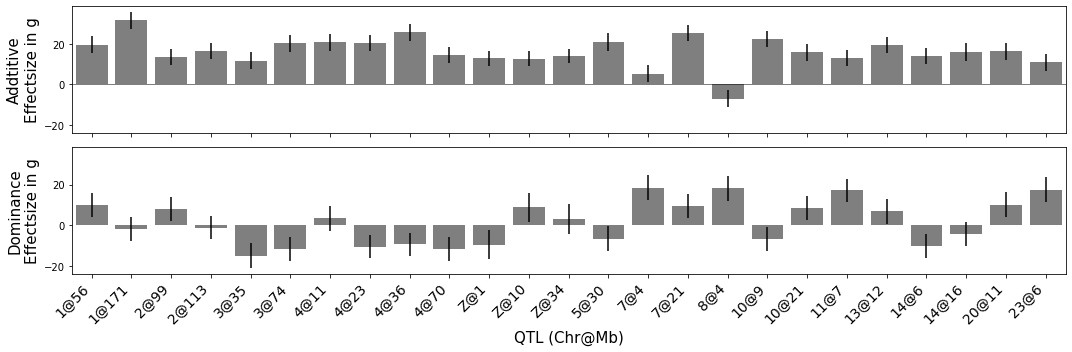

In [21]:
fig, (ax,ax1) = plt.subplots(ncols=1, nrows=2, figsize=(15,5), sharey=True, sharex=True)

sns.barplot(x='name', y='est', data=add_est_noF8, yerr=add_est_noF8['SE'], alpha=0.5, ax=ax, color='Black')
sns.barplot(x='name', y='est', data=dom_est_noF8, yerr=dom_est_noF8['SE'], alpha=0.5, ax=ax1, color='Black')

ax1.set_xticks(range(len(add_est_noF8)))
plotlabels = [ k['chromosome']+'@'+k['pos_Mb'] for i,k in merged.iterrows()]
ax1.set_xticklabels(plotlabels, rotation=45, ha='right', size=14)
ax.set_xlabel('', size=1)

ax1.set_xlabel('QTL (Chr@Mb)', size=15)
ax.set_ylabel('Addtitive\nEffectsize in g', size=15)

ax1.set_ylabel('Dominance\nEffectsize in g', size=15)

ax.axhline(0, color='Black', lw=0.5)

plt.tight_layout()

plt.savefig('../results/figures/20210113_effectsize_fitIND_stdbw8_add_dom_barchart.png')
plt.show()

In [21]:
merged

,name_add,est_add,SE_add,markers,name_dom,est_dom,SE_dom,chromosome,pos_Mb
0,1@189.0a,19.617375,4.037557,1-56,1@189.0d,10.036672,5.800635,1,56
1,1@668.5a,31.587175,4.059372,1-171,1@668.5d,-1.739296,5.863934,1,171
2,2@370.8a,13.471635,3.969608,2-99,2@370.8d,7.976767,5.834609,2,99
3,2@440.1a,16.572399,4.038987,2-113,2@440.1d,-1.248817,5.734832,2,113
4,3@94.5a,11.633456,4.268223,3-35,3@94.5d,-15.020140,6.077792,3,35
5,3@193.3a,20.345137,4.164513,3-74,3@193.3d,-11.941011,5.900769,3,74
6,4@77.4a,20.713488,4.366569,4-11,4@77.4d,3.449268,6.247663,4,11
7,4@142.4a,20.436330,3.989278,4-23,4@142.4d,-10.649994,5.786330,4,23
8,4@211.6a,25.620067,4.164513,4-36,4@211.6d,-9.512755,5.834609,4,36
9,4@333.9a,14.642848,3.914177,4-70,4@333.9d,-11.731802,5.902557,4,70


In [24]:
merged.est_add.sum()*2

813.8991646318242

In [35]:
for i, k in add_est_noF8.iterrows():
    print('{est}({SE})'.format(est=np.round(k['est'],1), SE=np.round(k['SE'],1)))

19.6(4.0)
31.6(4.1)
13.5(4.0)
16.6(4.0)
11.6(4.3)
20.3(4.2)
20.7(4.4)
20.4(4.0)
25.6(4.2)
14.6(3.9)
12.9(3.5)
12.8(3.8)
14.0(3.4)
20.9(4.3)
5.2(4.3)
25.6(4.0)
-7.1(4.2)
22.3(3.9)
15.8(4.3)
13.2(4.0)
19.6(3.9)
14.0(4.1)
16.0(4.3)
16.3(4.3)
10.9(4.3)


# Snippet Graveyard

calculate effectsize per generation/for each individual and take the mean

In [11]:
def convert_effectsize(df1, df2, group='GENERATION', pheno='BW8'):
    est_ll = {}
    for i, k in df1.iterrows():
        est_l = []
        est_l2 = []
        SE_l = []
        SE_l2 = []

        lid = 0
        id_l = []
        est = k['est']
        SE = k['SE']
        #print(est)
        for j, l in df2.groupby('GENERATION'):
            #print(l[pheno].std())
            #print(k['Unnamed: 0'],j,est*l[pheno].std())
            est_l.append(est*l[pheno].std()*len(l))
            est_l2.append(est*l[pheno].std())

            SE_l.append(SE*l[pheno].std()*len(l))
            SE_l2.append(SE*l[pheno].std())

            lid = lid+len(l)
            id_l.append(j)
        #print(k['Unnamed: 0'], np.sum(est_l)/lid)
        est_ll.setdefault(k['Unnamed: 0'],{})
        est_ll[k['Unnamed: 0']]['mean_effectsize'] = np.sum(est_l)/lid
        est_ll[k['Unnamed: 0']]['mean_SE'] = np.sum(SE_l)/lid
        est_ll[k['Unnamed: 0']]['all_effect'] = est_l2
        est_ll[k['Unnamed: 0']]['all_SE'] = SE_l2

    
    return est_ll, id_l
        

In [ ]:
all_convert = convert_effectsize(df1=effectsizes, df2=phenos)

In [ ]:
ll = []
for key, item in all_convert[0].items():
    l = []
    l.append(key)
    l.append(item['mean_effectsize'])
    l.append(item['mean_SE'])
    l = l + item['all_effect'] + item['all_SE']
    ll.append(l)

In [14]:
columns = ['name', 'mean_est', 'mean_SE']+['gen_'+str(i)+'_est' for i in all_convert[1]]+['gen_'+str(i)+'_SE' for i in all_convert[1]]

In [15]:
allconv_df = pd.DataFrame(ll)

In [16]:
allconv_df.columns = columns

In [17]:
plot_df = allconv_df[[i for i in allconv_df.columns if not i.endswith('SE')]]

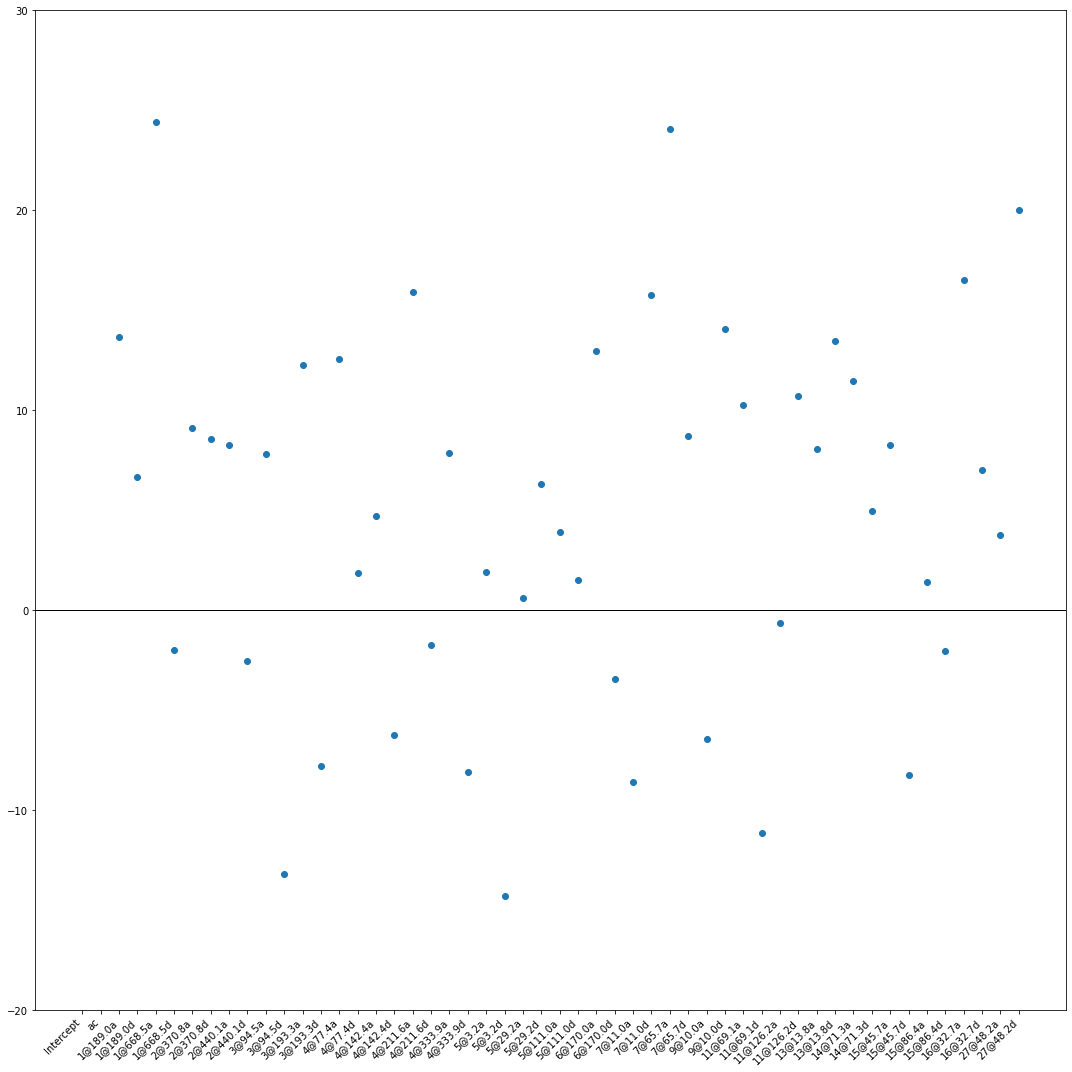

In [18]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,15))
ax.scatter(allconv_df.index, allconv_df['mean_est'])
ax.set_xticks(allconv_df.index)
ax.set_xticklabels(allconv_df['name'], rotation=45,ha='right', size=10)
ax.axhline(0, color='Black', lw=1)
ax.set_ylim(-20, 30)
plt.tight_layout()
plt.show()

In [20]:
plot_df_additive = pd.DataFrame([k for i,k in plot_df.iterrows() if k['name'].endswith('a')] )

In [21]:
plot_df_additive

,name,mean_est,gen_2_est,gen_3_est,gen_4_est,gen_5_est,gen_6_est,gen_7_est,gen_8_est,gen_9_est,gen_10_est,gen_11_est,gen_13_est,gen_14_est,gen_15_est,gen_16_est,gen_17_est,gen_18_est
2,1@189.0a,13.673846,15.319138,13.958232,10.773761,12.719346,13.840088,14.661636,10.005283,15.312730,14.350373,13.583828,14.753168,15.817813,13.304905,14.295238,13.601020,12.162237
4,1@668.5a,24.433305,27.373218,24.941463,19.251247,22.727743,24.730356,26.198351,17.878082,27.361768,25.642167,24.272455,26.361907,28.264281,23.774058,25.543647,24.303175,21.732265
6,2@370.8a,9.112182,10.208596,9.301695,7.179580,8.476108,9.222964,9.770440,6.667470,10.204326,9.563016,9.052194,9.831437,10.540910,8.866321,9.526274,9.063651,8.104853
8,2@440.1a,8.242042,9.233757,8.413458,6.493988,7.666708,8.342245,8.837441,6.030780,9.229895,8.649825,8.187782,8.892613,9.534338,8.019659,8.616591,8.198145,7.330905
10,3@94.5a,7.822444,8.763672,7.985134,6.163383,7.276400,7.917547,8.387533,5.723757,8.760006,8.209467,7.770947,8.439896,9.048950,7.611383,8.177926,7.780783,6.957693
12,3@193.3a,12.269976,13.746348,12.525164,9.667637,11.413472,12.419149,13.156351,8.978058,13.740598,12.877045,12.189199,13.238486,14.193825,11.938913,12.827570,12.204627,10.913561
14,4@77.4a,12.576105,14.089312,12.837660,9.908840,11.698233,12.729001,13.484595,9.202056,14.083419,13.198320,12.493314,13.568779,14.547953,12.236783,13.147611,12.509126,11.185849
16,4@142.4a,4.698757,5.264131,4.796481,3.702198,4.370761,4.755883,5.038192,3.438125,5.261929,4.931233,4.667824,5.069646,5.435491,4.571978,4.912287,4.673732,4.179322
18,4@211.6a,15.895449,17.808053,16.226039,12.524184,14.785870,16.088700,17.043726,11.630851,17.800604,16.681892,15.790805,17.150130,18.387748,15.466566,16.617798,15.810791,14.138247
20,4@333.9a,7.844738,8.788649,8.007892,6.180949,7.297138,7.940112,8.411437,5.740070,8.784973,8.232865,7.793095,8.463950,9.074740,7.633076,8.201233,7.802958,6.977522


In [32]:
tdict['27']

'23'